<a href="https://colab.research.google.com/github/Santhosh-1801/NLP-Practice/blob/main/SpamClassificationNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
!pip install nltk

In [125]:
#Preprocessing the Data in NLP
# 1) Lowering the format
# 2) Tokenization
# 3) Remove stop words
# 4) Steming/ Lemitization

In [126]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
import pandas as pd
from autocorrect import Speller
spell=Speller()

In [127]:
df=pd.read_csv(r'https://raw.githubusercontent.com/pydeveloperashish/Spam-Classifier-using-naive-bayes/main/spam.csv')

In [128]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [129]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [130]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [131]:
df.rename(columns={
    'v1':'Labels',
    'v2':'Messages'
},inplace=True)

In [132]:
df

,Labels,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [133]:
!pip install wordcloud

In [134]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [135]:
#Data Visualizing the spam words
spam_words=list(df[df['Labels']=='spam']['Messages'])

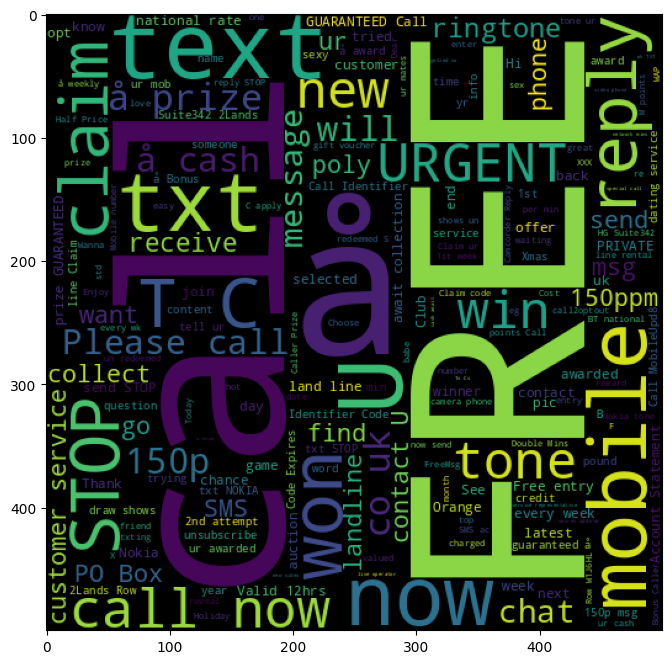

In [136]:
spam_words=' '.join(spam_words)
spam_words
spam_wc=WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

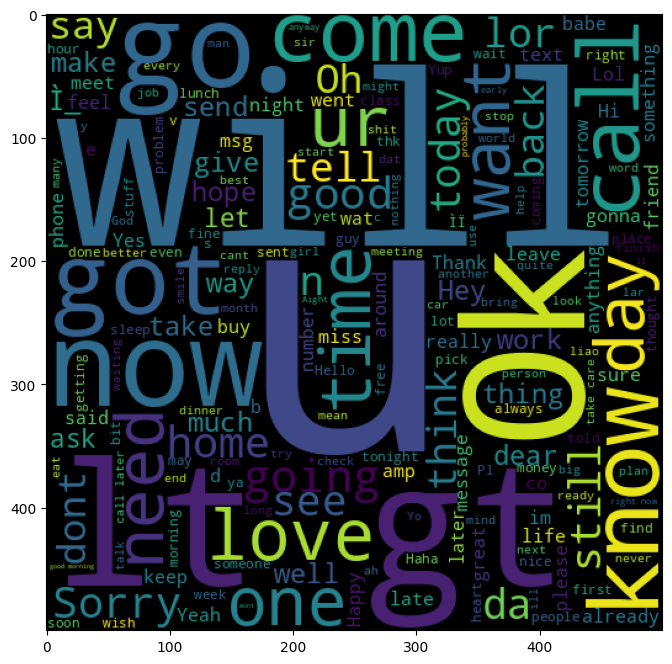

In [137]:
#Data Visualizing the spam words
ham_words=list(df[df['Labels']=='ham']['Messages'])
ham_words=' '.join(ham_words)
ham_wc=WordCloud(width=500,height=500).generate(ham_words)
plt.figure(figsize=(10,8))
plt.imshow(ham_wc)
plt.show()

In [138]:
#Preprocessing the data
df.head()

,Labels,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [139]:
df.shape

(5572, 2)

In [140]:
df['Labels']=df['Labels'].apply(lambda x: 1 if x=='spam' else 0)

In [141]:
df

,Labels,Messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [142]:
import tqdm,re

In [143]:
new_data=[]

for i in range(df.shape[0]):
  lines=df.iloc[i,1]

  #removing non alphabetic characters
  lines=re.sub('[^A-Za-z]',' ',lines)

  #lowering the string
  lines=lines.lower()

  #tokenization
  tokenized_lines=word_tokenize(lines)

  #removing stopwords, stemming and spell correction
  processed_lines=[]
  for i in tokenized_lines:
    if i not in set(stopwords.words('english')):
      processed_lines.append(spell(stemmer.stem(i)))

  final_lines=' '.join(processed_lines)
  new_data.append(final_lines)

In [144]:
new_data

['go during point crazy avail bugs n great world la e buffet cine got amor wat',
 'ok lar joke if u oni',
 'free entry wki comp win fa cup final tt st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf live around though',
 'frees hey dark week word back like fun still tb ok xxx std chg send rev',
 'even brother like speak treat like aid patent',
 'per request well well oru minnaminungint nurungu vietnam set callertun caller press copy friend callertun',
 'winner value network custom select received prize reward claim call claim code kl valid hour',
 'mobil month u r entity update latest colour mobil camera free call mobil update co free',
 'gon na home soon want talk stuff anymore tonight k cri enough today',
 'six chance win cash pound txt cs send cost p day day stand apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www duk net lccltd box link rw',
 'search right word thank breathe pro

In [145]:
len(new_data)

5572

In [146]:
y=df['Labels']
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Labels, Length: 5572, dtype: int64

In [147]:
y.value_counts()

0    4825
1     747
Name: Labels, dtype: int64

## **Splitting into train and test data**

In [148]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(new_data,y,test_size=0.20)

In [149]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [150]:
vectorizer=TfidfVectorizer()
vectorizer.fit(X_train)

TfidfVectorizer()

In [151]:
X_train_tf=vectorizer.transform(X_train)

In [152]:
X_train=X_train_tf.toarray()

In [153]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [154]:
X_test_tf = vectorizer.transform(X_test)

In [176]:
X_test=X_test_tf.toarray()

In [177]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [178]:
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler(sampling_strategy=1)
X_train_ros, y_train_ros = ROS.fit_resample(X_train, y_train)

In [179]:
from collections import Counter
Counter(y_train_ros)

Counter({0: 3864, 1: 3864})

In [180]:
from sklearn.naive_bayes import GaussianNB

In [181]:
model=GaussianNB()

In [182]:
model.fit(X_train_ros,y_train_ros)

GaussianNB()

In [183]:
model.classes_

array([0, 1])

In [184]:
Y_pred=model.predict(X_test)

In [185]:
len(Y_pred)

1115

In [186]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [188]:
accuracy_score(y_test,Y_pred) * 100

83.58744394618834

In [190]:
confusion_matrix(y_test,Y_pred)

array([[806, 155],
       [ 28, 126]])